<a href="https://colab.research.google.com/github/Denielt1/AnalisadordeReder/blob/main/TrabalhoFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
import pandas as pd

uploaded = files.upload()
  
dataset1 = pd.read_csv('entrada1.csv',sep=',')
dataset2 = pd.read_csv('saidaa1.csv',sep=',')
dataset3 = pd.read_csv('saidaa2.csv',sep=',')
entrada = pd.DataFrame(dataset1)
saida1 = pd.DataFrame(dataset2)
saida2 = pd.DataFrame(dataset3)
print(entrada)
print(saida1)
print(saida2)

Saving entrada1.csv to entrada1.csv
Saving saidaa1.csv to saidaa1.csv
Saving saidaa2.csv to saidaa2.csv
                       Time / ns                i1/real
0     ----------------------------------------------...
1                            0                 -6.33...
2                0.00011398976                 -2.15...
3                0.00022797953                  2.15...
4                0.00034196925                  1.44...
...                                                 ...
7376                0.84067446                      ...
7377                0.84078842                      ...
7378                0.84090245                      ...
7379                0.84101641                      ...
7380                0.84113044                      ...

[7381 rows x 1 columns]
                            Time / ns                o1  1/real
0     ----------------------------------------------...     NaN
1                            0                      ...     NaN
2      

#Plot dos sinais no tempo

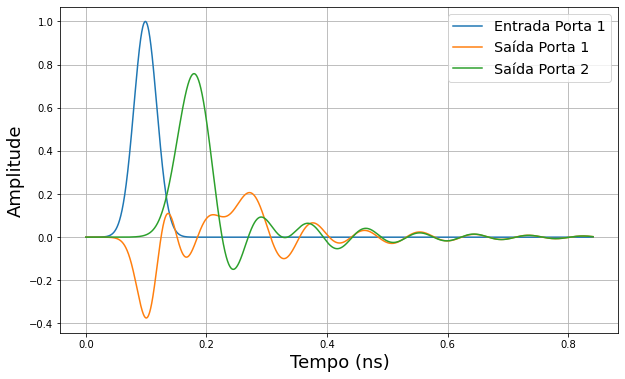

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

i1 = np.array(entrada.iloc[1:])
o1 = np.array(saida1.iloc[1:])
o2 = np.array(saida2.iloc[1:])
temp_ent1 = []
temp_said1 = []
temp_said2 = []
val_ent1 = []
val_said1 = []
val_said2 = []

i = 0
while i < len(i1):
  a  =  np.char.split(i1[i][0])
  b  =  np.char.split(o1[i][0])
  c =   np.char.split(o2[i][0])

  temp_ent1.append(float(np.char.array(a)[0]))    #Tempo na entrada (em nano segundos)
  val_ent1.append(float(np.char.array(a)[1]))     #Amplitude na entrada

  temp_said1.append(float(np.char.array(b)[0]))   #Tempo na saída   (em nano segundos)
  val_said1.append(float(np.char.array(b)[1]))    #Amplitude na saída

  temp_said2.append(float(np.char.array(c)[0]))   #Tempo na saída   (em nano segundos)
  val_said2.append(float(np.char.array(c)[1]))    #Amplitude na saída

  i += 1

plt.figure(figsize=[10,6])
plt.plot(temp_ent1, val_ent1, label='Entrada Porta 1')
plt.plot(temp_said1, val_said1, label='Saída Porta 1')
plt.plot(temp_said2, val_said2, label='Saída Porta 2')
plt.legend(fontsize='x-large')
plt.xlabel('Tempo (ns)', FontSize=18)
plt.ylabel('Amplitude',  FontSize=18)
plt.grid()
plt.show()


#Sinal de saída com ruído

-Ruído Uniforme

-Ruído Gaussiano

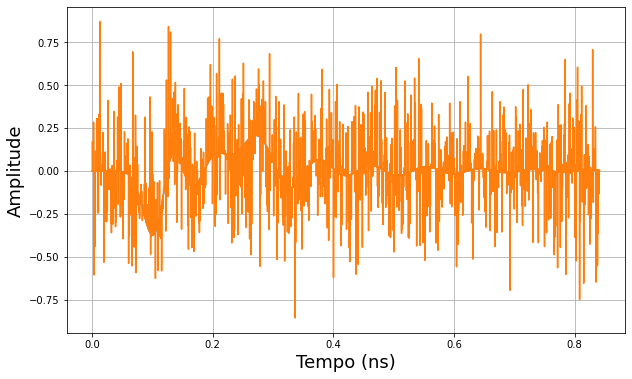

0.9503505370255726


In [ ]:
amp_ruido = 0.28
def relacaoSR(Sinal, Ruido):
  pot_Sinal = sum(np.square(Sinal))/len(Sinal)
  pot_Ruido = sum(np.square(Ruido))/len(Ruido)
  return pot_Sinal/pot_Ruido

#ruido = -amp_ruido/2 + amp_ruido*np.random.rand(len(val_said1))
#ruido = 0.2*np.random.normal(0, 0.1, len(val_said1))

distancia = 10
len_sig = len(val_said1)
ruido = np.ravel(np.zeros([1, len_sig]))
ruido[0::distancia] = np.random.normal(0,amp_ruido,len_sig)[0::distancia]


nova_saida = val_said1 + ruido
nova_saida2 = val_said2 + ruido

SNR = relacaoSR(val_said1, ruido)

plt.figure(figsize=[10,6])
plt.plot(temp_said1, val_said1)
plt.plot(temp_said1, nova_saida)
plt.xlabel('Tempo (ns)', FontSize=18)
plt.ylabel('Amplitude', FontSize=18)
plt.grid()
plt.show()

#print(pot_sinal)
#print(pot_ruido)
print(SNR)

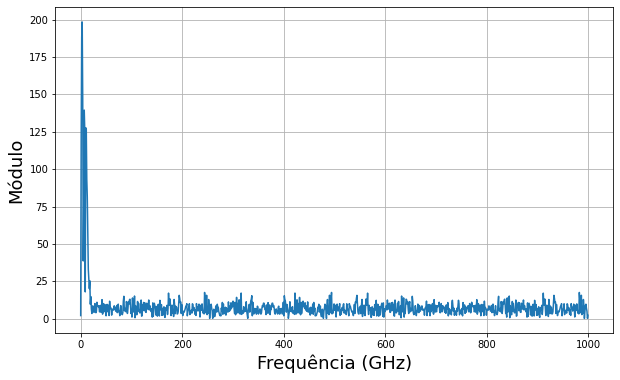

In [ ]:
Sina2_1_todo = np.fft.fft(val_said1, n= len(val_said1))
Sina2_2_todo = np.fft.fft(nova_saida, n= len(val_said1))
Sina21 = abs(Sina2_1_todo)
Sina22 = abs(Sina2_2_todo)

#plt.plot(Sina21)
plt.figure(figsize=[10,6])
plt.plot(Sina22[:1000])
plt.xlabel('Frequência (GHz)', FontSize=18)
plt.ylabel('Módulo', FontSize=18)
plt.grid()
plt.show()

#Função para Resposta em Frequência

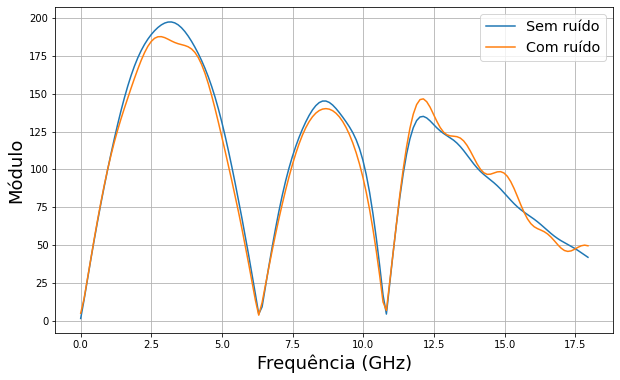

In [ ]:
fat = 10   #Fator de multiplicação do tamanho do vetor da fft

def respFreq(sinal_entrada, sinal_saida):
  fat = 10
  S_entrada = np.fft.fft(sinal_entrada, n= len(sinal_entrada)*fat)
  S_entrada = abs(S_entrada)

  S_saida = np.fft.fft(sinal_saida, n= len(sinal_entrada)*fat)
  S_saida = abs(S_saida)

  n = np.arange(0, 18, 1/(fat*temp_ent1[len(temp_ent1)-1]))
  resp_freq = S_saida[:len(n)]/S_entrada[:len(n)]
  resp_freq = 20*np.log10(resp_freq)

  return n, resp_freq


Sina = np.fft.fft(val_ent1, n= len(val_ent1)*fat)
Sina = abs(Sina)


Sina2_1 = np.fft.fft(val_said1, n= len(val_said1)*fat)
Sina2_2 = np.fft.fft(nova_saida, n= len(val_said1)*fat)
Sina2_1 = abs(Sina2_1)
Sina2_2 = abs(Sina2_2)

Sina3_1 = np.fft.fft(val_said2, n= len(val_said2)*fat)
Sina3_2 = np.fft.fft(nova_saida2, n= len(val_said2)*fat)
Sina3_1 = abs(Sina3_1)
Sina3_2 = abs(Sina3_2)


n = np.arange(0, 18, 1/(fat*temp_ent1[len(temp_ent1)-1]))


plt.figure(figsize=[10,6])
#plt.plot(n, Sina[:len(n)])
plt.plot(n, Sina2_1[:len(n)], label='Sem ruído')
plt.plot(n, Sina2_2[:len(n)], label='Com ruído')
plt.xlabel('Frequência (GHz)', FontSize=18)
plt.ylabel('Módulo', FontSize=18)
plt.legend(fontsize='x-large')
plt.grid()
plt.show()




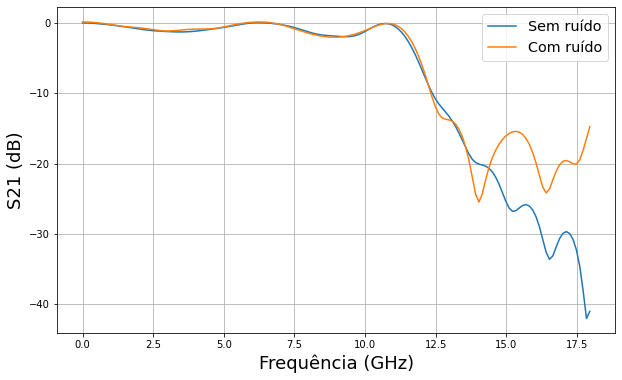

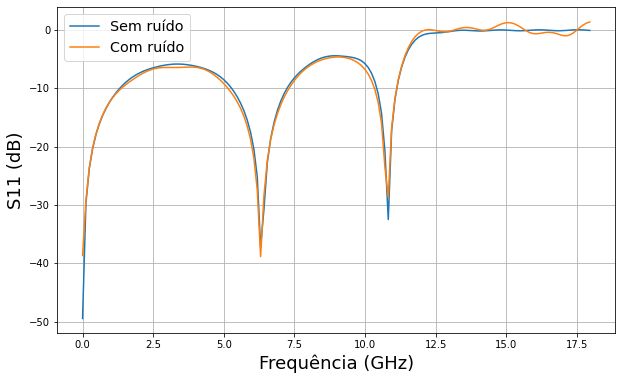

In [ ]:
n1, s21 = respFreq(val_ent1, val_said2)
n2, s11 = respFreq(val_ent1, val_said1)

n3, s21_ruido = respFreq(val_ent1, nova_saida2)
n4, s11_ruido = respFreq(val_ent1, nova_saida)


plt.figure(figsize=[10,6])
plt.plot(n1, s21, label='Sem ruído')
plt.plot(n3, s21_ruido, label='Com ruído')
plt.xlabel('Frequência (GHz)', FontSize=18)
plt.ylabel('S21 (dB)', FontSize=18)
plt.legend(fontsize='x-large')
plt.grid()
plt.show()

plt.figure(figsize=[10,6])
plt.plot(n2, s11, label='Sem ruído')
plt.plot(n4, s11_ruido, label='Com ruído')
plt.xlabel('Frequência (GHz)', FontSize=18)
plt.ylabel('S11 (dB)', FontSize=18)
plt.legend(fontsize='x-large')
plt.grid()
plt.show()

#Análise do Erro Pra Geral

In [ ]:
#amp_ruido = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3]
def erroS(dado1, dado2):
  erro = abs(dado1 - dado2)
  #print(dado1[150], dado2[150], erro[150])
  erro = sum(erro)/len(erro)
  return erro

def maiorErro(dado1, dado2):
  diferen = abs(dado1 - dado2)
  return max(diferen)

amp_ruido = np.arange(0.001, 0.4, 0.002)
#amp_ruido= [0.01, 0.02]

media_erro_f = []
media_erro2_f = []
snr1 = []
snr2 = []
maior_erro1 = []
maior_erro2 = []

distancia = 10
for bb in amp_ruido:
  media_atual1 = 0
  media_atual2 = 0
  SNR1 = 0
  SNR2 = 0
  mai1 = 0
  mai2 = 0
  
  for cv in range(100):
    len_sig = len(val_said1)
    ruido = np.ravel(np.zeros([1, len_sig]))
    ruido[0::distancia] = np.random.normal(0,bb,len_sig)[0::distancia] #Ruído inserido ao sinal
    
    nova_saida = val_said1 + ruido                                         # Sinal de saída1 com rúido
    nova_saida2 = val_said2 + ruido                                        # Sinal de saída2 com rúido

    nn, s11_testes = respFreq(val_ent1, nova_saida)                        # s11 com ruído
    nn2, s21_testes = respFreq(val_ent1, nova_saida2)                      # s21 com ruído

    media_atual1 += erroS(s11_testes, s11)                                 # Média da diferença entre as respostas de s11
    media_atual2 += erroS(s21_testes, s21)
    
    SNR1 += relacaoSR(val_said1, ruido)
    SNR2 += relacaoSR(val_said2, ruido)                              # Média da diferença entre as respostas de s21

    mai1 += maiorErro(s11_testes, s11)
    mai2 += maiorErro(s21_testes, s21)


  media_erro_f.append(media_atual1/100)                                    # Média final da diferença para s11
  media_erro2_f.append(media_atual2/100)
  snr1.append(20*np.log10(SNR1/100))
  snr2.append(20*np.log10(SNR2/100))                                    # Média final da diferença para s21
  maior_erro1.append(mai1/100)
  maior_erro2.append(mai2/100)


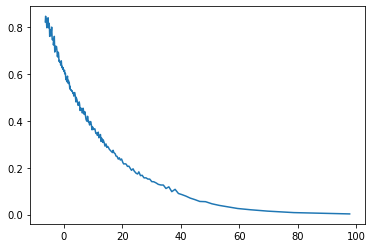

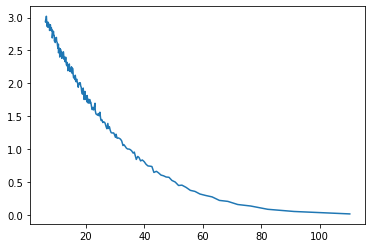

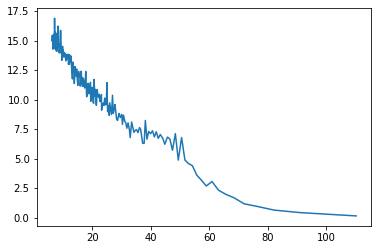

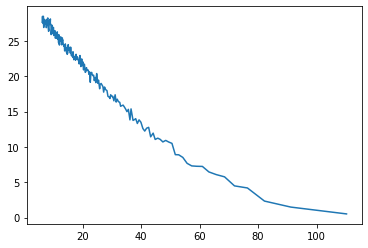

<class 'list'>
<class 'list'>


In [ ]:
plt.plot(snr1, media_erro_f)
plt.show()
plt.plot(snr2, media_erro2_f)
plt.show()
plt.plot(snr2, maior_erro1)
plt.show()
plt.plot(snr2, maior_erro2)
plt.show()
print(type(snr1))
print(type(media_erro_f))

[15.4803077   0.0204582  -2.36851096] [ 4.10890294e+01  1.52687894e-02 -8.91568638e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


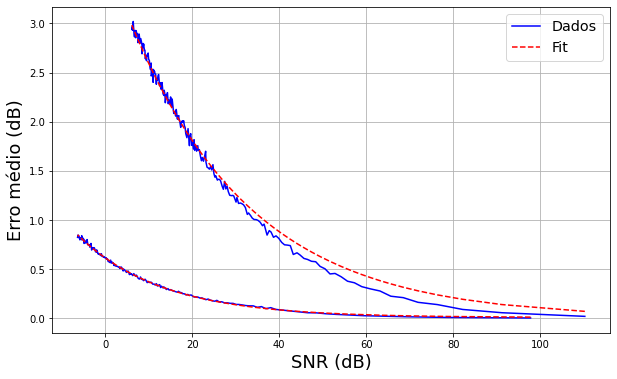

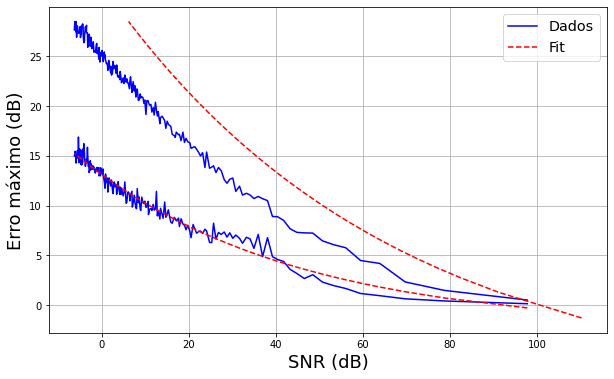

In [ ]:
from scipy.optimize import curve_fit


snr1 = np.array(snr1)
snr2 = np.array(snr2)
media_erro_f = np.array(media_erro_f)
media_erro2_f = np.array(media_erro2_f)
maior_erro1 = np.array(maior_erro1)
maior_erro2 = np.array(maior_erro2)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c


def erroS(dado1, dado2):
  erro = abs(dado1 - dado2)/dado2
  erro = sum(erro)/len(erro)
  return erro

popt1, pcov1 = curve_fit(func, snr1, media_erro_f)
popt2, pcov2 = curve_fit(func, snr2, media_erro2_f, bounds=(0, [4.0,  0.036, 0.000000001]))

popt3, pcov3 = curve_fit(func, snr1, maior_erro1)
popt4, pcov4 = curve_fit(func, snr2, maior_erro2)

print(popt3, popt4)

plt.figure(figsize=[10,6])
plt.plot(snr1,media_erro_f, 'b', label='Dados')
plt.plot(snr1, func(snr1, *popt1), 'r--', label='Fit')
plt.plot(snr2,media_erro2_f, 'b')
plt.plot(snr2, func(snr2, *popt2), 'r--')
plt.xlabel('SNR (dB)', FontSize=18)
plt.ylabel('Erro médio (dB)', FontSize=18)
plt.grid(which='both')
plt.legend(fontsize='x-large')
plt.show()
#plt.semilogx(snr1,media_erro_f, 'b', label='Dados')

#plt.legend(fontsize='x-large')

#plt.show()

#plt.figure(figsize=[10,6])
#plt.semilogx(snr2,media_erro2_f, 'b', label='Dados')
#plt.plot(snr2,media_erro2_f, 'b', label='Dados')
#plt.plot(snr2, func(snr2, *popt2), 'r--', label='Fit')
#plt.xlabel('SNR (dB)', FontSize=18)
#plt.ylabel('Erro médio (dB)', FontSize=18)

#plt.grid(which='both')
#plt.annotate('local max', xy=(20, 2.5), xytext=(21, 3), )
#plt.show()

plt.figure(figsize=[10,6])
#plt.semilogx(snr1,media_erro_f, 'b', label='Dados')
plt.plot(snr1,maior_erro1, 'b', label='Dados')
plt.plot(snr1, func(snr1, *popt3), 'r--', label='Fit')
plt.plot(snr1,maior_erro2, 'b')
plt.plot(snr2, func(snr2, *popt4), 'r--')
plt.xlabel('SNR (dB)', FontSize=18)
plt.ylabel('Erro máximo (dB)', FontSize=18)
plt.legend(fontsize='x-large')
plt.grid(which='both')
plt.show()

#plt.figure(figsize=[10,6])
#plt.semilogx(snr1,media_erro_f, 'b', label='Dados')

#plt.xlabel('SNR (dB)', FontSize=18)
#plt.ylabel('Erro máximo (dB)', FontSize=18)
#plt.legend(fontsize='x-large')
#plt.grid(which='both')
#plt.show()
